In [1]:
# libraries 
import pandas as pd      # data analysis and manipulation
import numpy as np       # working with array, numeric computation
import matplotlib.pyplot as plt   # for visualization
import seaborn as sns            # next version of matplotlib also for visualization 

In [2]:
#data loading

In [3]:
bank_full = pd.read_csv(r"D:\Data Science Material\Assignments\Logistic regression assignment\bank-full.csv")

In [4]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# making original data secure and unchange
bank_full01 = bank_full.copy()

In [9]:
bank_full01.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [10]:
bank_full01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bank_full01.shape

(45211, 17)

In [12]:
bank_full01.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [13]:
bank_full01.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
bank_full01.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [15]:
bank_full01.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [16]:
bank_full01.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
bank_full01.mean()

<ipython-input-17-956eccc627be>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_full01.mean()


age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [18]:
bank_full01.median()

<ipython-input-18-9a3e1dd94fc3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_full01.median()


age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

# Visualization

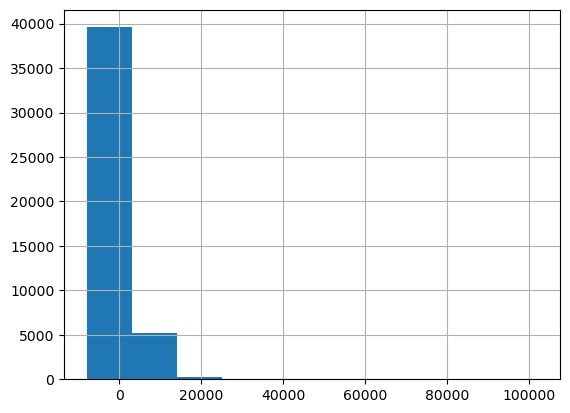

In [19]:
# histogram
bank_full01['balance'].hist()
plt.show()

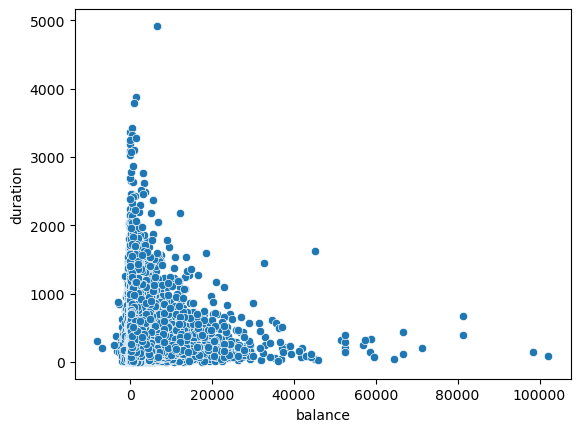

In [20]:
# scatter plot
sns.scatterplot(x='balance',y='duration',data = bank_full01)
plt.show()

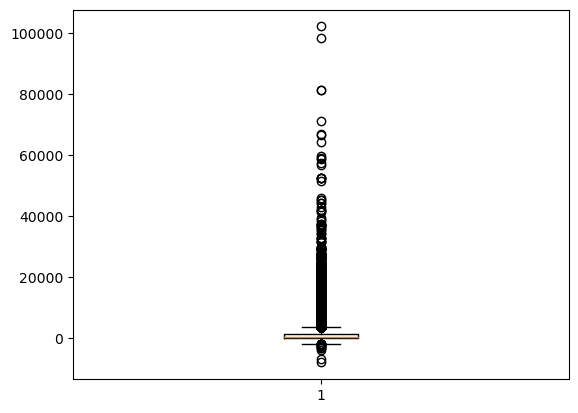

In [21]:
# boxplot
plt.boxplot(bank_full01['balance'],vert = True)
plt.show()

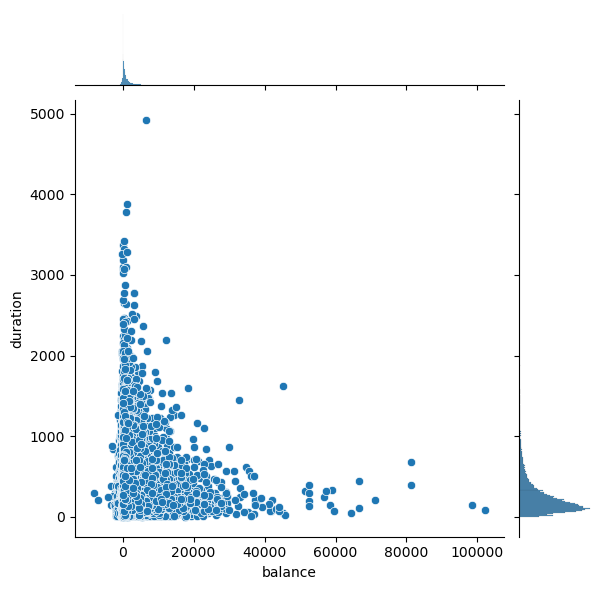

In [22]:
# jointplot
sns.jointplot(x='balance',y='duration',data = bank_full01)
plt.show()

In [23]:
bank_full01[0:1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [24]:
# droping the columns as not required now
bank_full01.drop(['job','month','campaign','pdays','previous','poutcome'],inplace = True,axis =1)

In [25]:
bank_full01.head(1)

,age,marital,education,default,balance,housing,loan,contact,day,duration,y
0,58,married,tertiary,no,2143,yes,no,unknown,5,261,no


In [26]:
# showing how much variable have to perticuler cols with actual value
bank_full01.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [27]:
# making dummie cols for the same cols
marital = pd.get_dummies(bank_full01['marital'],drop_first=True)

In [28]:
marital.head(1)

,married,single
0,1,0


In [29]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,marital],axis = 1)

In [30]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['marital'],inplace = True, axis = 1)

In [31]:
bank_full01.head(1)

,age,education,default,balance,housing,loan,contact,day,duration,y,married,single
0,58,tertiary,no,2143,yes,no,unknown,5,261,no,1,0


In [32]:
# showing how much variable have to perticuler cols with actual value
bank_full01.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [33]:
# making dummie cols for the same cols
education = pd.get_dummies(bank_full01['education'],drop_first=True)

In [34]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,education],axis = 1)

In [35]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['education'],inplace = True,axis = 1)

In [36]:
bank_full01.head(1)

,age,default,balance,housing,loan,contact,day,duration,y,married,single,secondary,tertiary,unknown
0,58,no,2143,yes,no,unknown,5,261,no,1,0,0,1,0


In [37]:
# showing how much variable have to perticuler cols with actual value
bank_full01.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [38]:
# making dummie cols for the same cols
default = pd.get_dummies(bank_full01['default'],drop_first = True)

In [39]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,default],axis = 1)

In [40]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['default'],inplace = True,axis = 1)

In [41]:
bank_full01.head(1)

,age,balance,housing,loan,contact,day,duration,y,married,single,secondary,tertiary,unknown,yes
0,58,2143,yes,no,unknown,5,261,no,1,0,0,1,0,0


In [42]:
# showing how much variable have to perticuler cols with actual value
bank_full01.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [43]:
# making dummie cols for the same cols
housing = pd.get_dummies(bank_full01['housing'],drop_first = True)

In [44]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,housing],axis = 1)

In [45]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['housing'],inplace = True,axis = 1)

In [46]:
bank_full01.head(1)

,age,balance,loan,contact,day,duration,y,married,single,secondary,tertiary,unknown,yes,yes
0,58,2143,no,unknown,5,261,no,1,0,0,1,0,0,1


In [47]:
# making dummie cols for the same cols
loan = pd.get_dummies(bank_full01['loan'],drop_first=True)

In [48]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,loan],axis = 1)

In [49]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['loan'],inplace = True,axis = 1)

In [50]:
bank_full01.head(1)

,age,balance,contact,day,duration,y,married,single,secondary,tertiary,unknown,yes,yes,yes
0,58,2143,unknown,5,261,no,1,0,0,1,0,0,1,0


In [51]:
# showing how much variable have to perticuler cols with actual value
bank_full01.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [52]:
# making dummie cols for the same cols
contact = pd.get_dummies(bank_full01['contact'],drop_first = 1)

In [53]:
# it makes joints the cols 
bank_full01 = pd.concat([bank_full01,contact],axis = 1)

In [54]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['contact'],inplace = True,axis = 1)

In [55]:
bank_full01.head(1)

,age,balance,day,duration,y,married,single,secondary,tertiary,unknown,yes,yes,yes,telephone,unknown
0,58,2143,5,261,no,1,0,0,1,0,0,1,0,0,1


In [56]:
# making dummie cols for the same cols
y = pd.get_dummies(bank_full01['y'],drop_first = True,)

In [57]:
# it makes joints the cols
bank_full01 = pd.concat([bank_full01,y],axis = 1)

In [58]:
# it wll drop the perticuler cols from dataset
bank_full01.drop(['y'],inplace = True,axis=1)

In [59]:
bank_full01.head(2)

,age,balance,day,duration,married,single,secondary,tertiary,unknown,yes,yes,yes,telephone,unknown,yes
0,58,2143,5,261,1,0,0,1,0,0,1,0,0,1,0
1,44,29,5,151,0,1,1,0,0,0,1,0,0,1,0


In [60]:
bank_full01.shape

(45211, 15)

In [61]:
bank_full01.describe()

,age,balance,day,duration,married,single,secondary,tertiary,unknown,yes,yes,yes,telephone,unknown,yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,0.601933,0.282896,0.513194,0.294198,0.041074,0.018027,0.555838,0.160226,0.064276,0.287983,0.116985
std,10.618762,3044.765829,8.322476,257.527812,0.489505,0.450411,0.499831,0.455687,0.198464,0.133049,0.496878,0.366820,0.245247,0.452828,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# it show the null values in the data set
bank_full01.isna().sum()

age          0
balance      0
day          0
duration     0
married      0
single       0
secondary    0
tertiary     0
unknown      0
yes          0
yes          0
yes          0
telephone    0
unknown      0
yes          0
dtype: int64

In [69]:
# Dividing our data into input and output variables 
X = bank_full01.iloc[:,0:14]
Y = bank_full01.iloc[:,-1]

In [70]:
X

,age,balance,day,duration,married,single,secondary,tertiary,unknown,yes,yes,yes,telephone,unknown
0,58,2143,5,261,1,0,0,1,0,0,1,0,0,1
1,44,29,5,151,0,1,1,0,0,0,1,0,0,1
2,33,2,5,76,1,0,1,0,0,0,1,1,0,1
3,47,1506,5,92,1,0,0,0,1,0,1,0,0,1
4,33,1,5,198,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,1,0,0,1,0,0,0,0,0,0
45207,71,1729,17,456,0,0,0,0,0,0,0,0,0,0
45208,72,5715,17,1127,1,0,1,0,0,0,0,0,0,0
45209,57,668,17,508,1,0,1,0,0,0,0,0,1,0


In [71]:
y

,yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [72]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)


LogisticRegression()

In [73]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [74]:
y_pred_df = pd.DataFrame({'Actual':Y,'Predicted_prob':y_pred})

In [75]:
y_pred_df

,Actual,Predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [76]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39188   734]
 [ 4268  1021]]


In [77]:
# accuracy 
((39188+1021)/(39188+734+4268+1021))*100

88.93632080688329

In [78]:
#Classification report
from sklearn.metrics import classification_report
classification_report = classification_report(y,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



# Accuracy is 89 %